In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
import pandas as pd

# Load data
df = pd.read_csv("Costco Membership Retention and Churn Analysis.csv")

In [54]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [62]:
print( df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
LeftMembership      0
dtype: int64


In [72]:
# Convert TotalCharges to numeric, drop missing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Create binary churn column
df['Churn'] = df['LeftMembership'].map({'Yes': 1, 'No': 0})
print (df)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [18]:
# Descriptive statistics for numeric columns
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges        Churn
count    7032.000000  7032.000000     7032.000000   7032.000000  7032.000000
mean        0.162400    32.421786       64.798208   2283.300441     0.265785
std         0.368844    24.545260       30.085974   2266.771362     0.441782
min         0.000000     1.000000       18.250000     18.800000     0.000000
25%         0.000000     9.000000       35.587500    401.450000     0.000000
50%         0.000000    29.000000       70.350000   1397.475000     0.000000
75%         0.000000    55.000000       89.862500   3794.737500     1.000000
max         1.000000    72.000000      118.750000   8684.800000     1.000000


In [22]:
# Check unique values for each categorical column
for col in df.select_dtypes(include='object').columns:
    if col != 'customerID':
        print(f"\nUnique values in {col}: {df[col].unique()}")


Unique values in gender: ['Female' 'Male']

Unique values in Partner: ['Yes' 'No']

Unique values in Dependents: ['No' 'Yes']

Unique values in PhoneService: ['No' 'Yes']

Unique values in MultipleLines: ['No phone service' 'No' 'Yes']

Unique values in InternetService: ['DSL' 'Fiber optic' 'No']

Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']

Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']

Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']

Unique values in TechSupport: ['No' 'Yes' 'No internet service']

Unique values in StreamingTV: ['No' 'Yes' 'No internet service']

Unique values in StreamingMovies: ['No' 'Yes' 'No internet service']

Unique values in Contract: ['Month-to-month' 'One year' 'Two year']

Unique values in PaperlessBilling: ['Yes' 'No']

Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Unique values in LeftMembership: ['No' 'Yes']


In [24]:
# Show missing values per column
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
LeftMembership      0
Churn               0
dtype: int64


In [26]:
# Correlation between numerical features
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                 SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
SeniorCitizen        1.000000  0.015683        0.219874      0.102411   
tenure               0.015683  1.000000        0.246862      0.825880   
MonthlyCharges       0.219874  0.246862        1.000000      0.651065   
TotalCharges         0.102411  0.825880        0.651065      1.000000   
Churn                0.150541 -0.354049        0.192858     -0.199484   

                   Churn  
SeniorCitizen   0.150541  
tenure         -0.354049  
MonthlyCharges  0.192858  
TotalCharges   -0.199484  
Churn           1.000000  


In [74]:
# Count of churned vs non-churned
churn_counts = df['Churn'].value_counts()
churn_rate = df['Churn'].mean()

print("\nChurn Counts:\n", churn_counts)
print(f"\nChurn Rate: {churn_rate:.2%}")


Churn Counts:
 Churn
0    5163
1    1869
Name: count, dtype: int64

Churn Rate: 26.58%


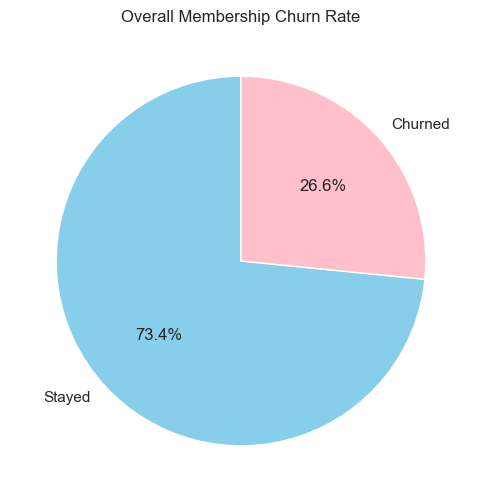

In [90]:
# Style setup
sns.set(style="whitegrid")

# Pie chart for churn distribution
plt.figure(figsize=(6, 6))
df['Churn'].value_counts().plot.pie(
    labels=["Stayed", "Churned"],
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'pink']
)
plt.title('Overall Membership Churn Rate')
plt.ylabel('')
plt.show()

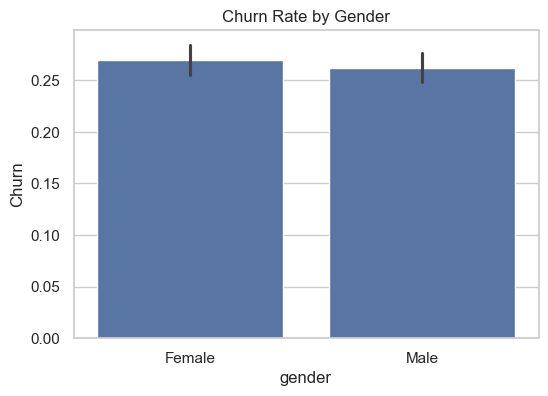

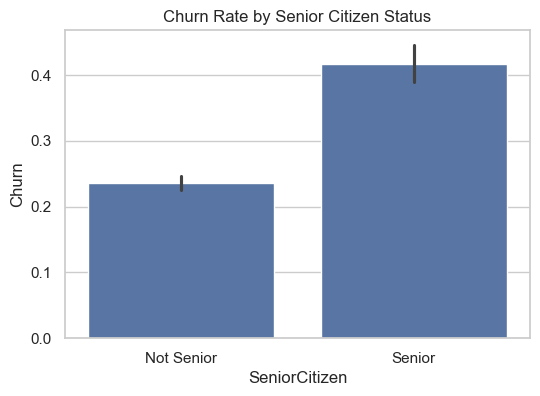

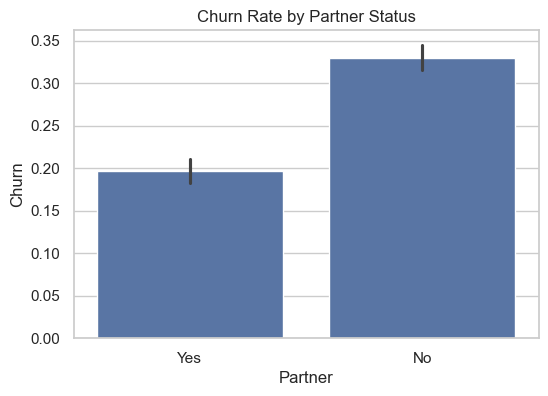

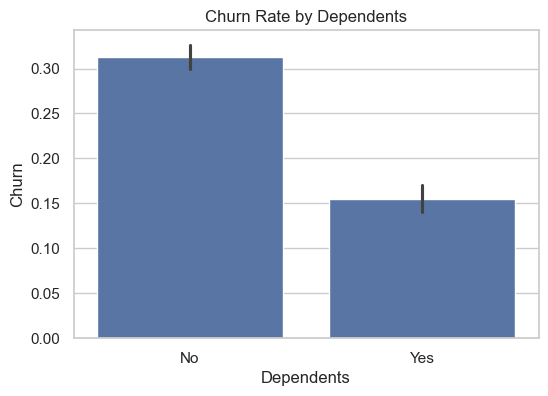

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gender
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='gender', y='Churn')
plt.title('Churn Rate by Gender')
plt.show()

# SeniorCitizen
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='SeniorCitizen', y='Churn')
plt.title('Churn Rate by Senior Citizen Status')
plt.xticks([0, 1], ['Not Senior', 'Senior'])
plt.show()

# Partner
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Partner', y='Churn')
plt.title('Churn Rate by Partner Status')
plt.show()

# Dependents
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Dependents', y='Churn')
plt.title('Churn Rate by Dependents')
plt.show()

C:\Users\Tingi\AppData\Local\Temp\ipykernel_21556\2775893412.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=service, y='Churn', palette="plasma")


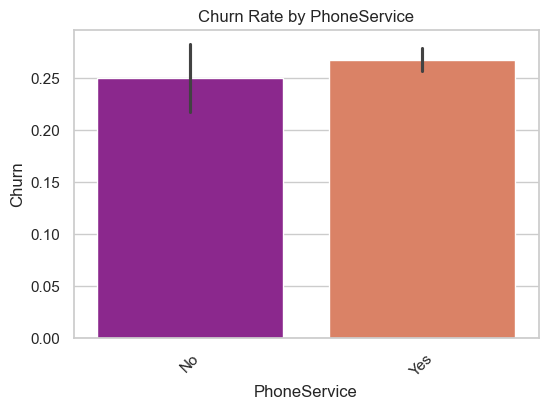

C:\Users\Tingi\AppData\Local\Temp\ipykernel_21556\2775893412.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=service, y='Churn', palette="plasma")


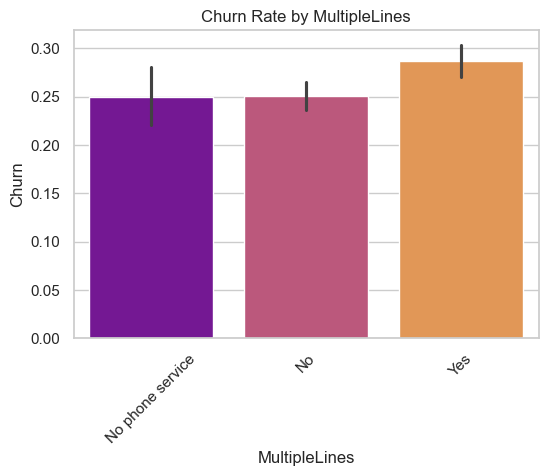

C:\Users\Tingi\AppData\Local\Temp\ipykernel_21556\2775893412.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=service, y='Churn', palette="plasma")


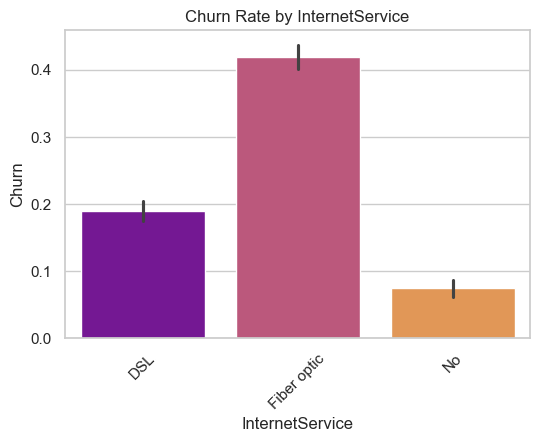

C:\Users\Tingi\AppData\Local\Temp\ipykernel_21556\2775893412.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=service, y='Churn', palette="plasma")


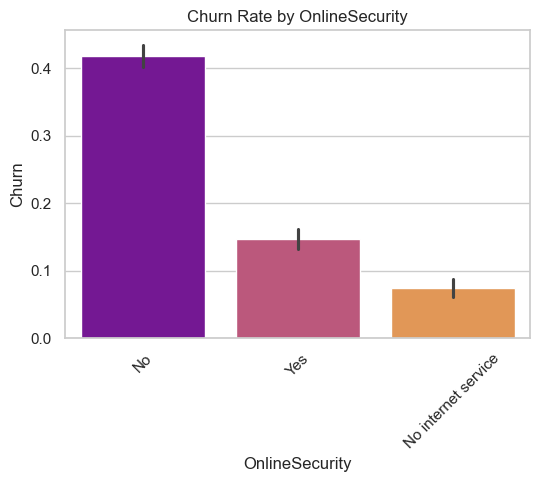

C:\Users\Tingi\AppData\Local\Temp\ipykernel_21556\2775893412.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=service, y='Churn', palette="plasma")


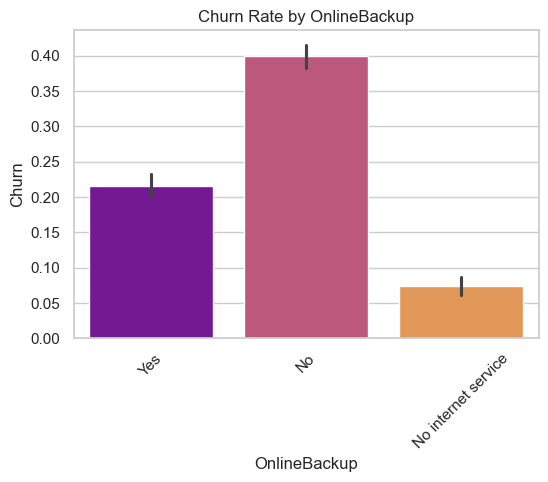

C:\Users\Tingi\AppData\Local\Temp\ipykernel_21556\2775893412.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=service, y='Churn', palette="plasma")


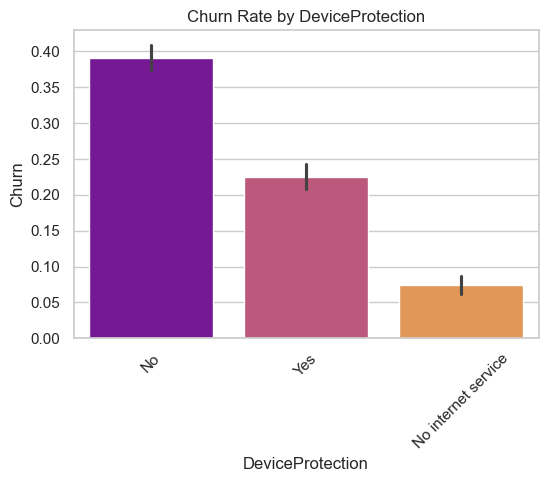

C:\Users\Tingi\AppData\Local\Temp\ipykernel_21556\2775893412.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=service, y='Churn', palette="plasma")


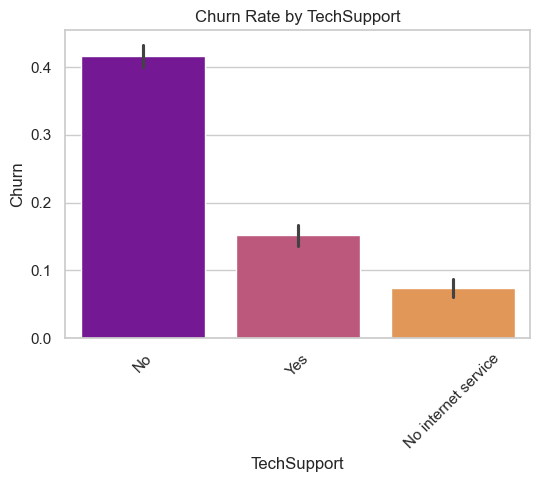

C:\Users\Tingi\AppData\Local\Temp\ipykernel_21556\2775893412.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=service, y='Churn', palette="plasma")


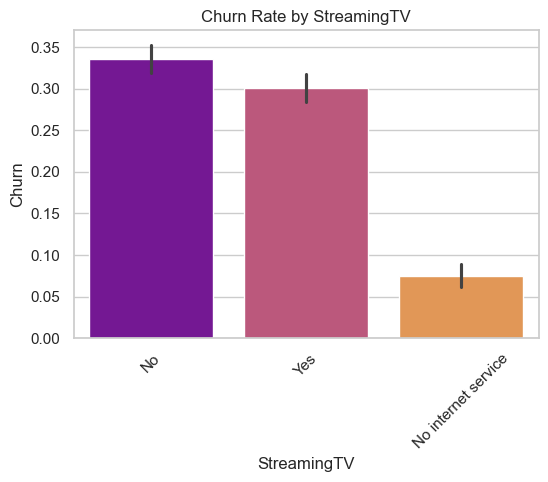

C:\Users\Tingi\AppData\Local\Temp\ipykernel_21556\2775893412.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=service, y='Churn', palette="plasma")


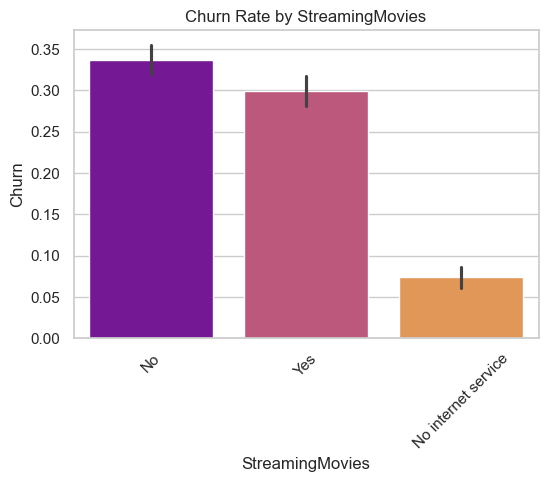

In [109]:
service_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for service in service_columns:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=df, x=service, y='Churn', palette="plasma")
    plt.title(f'Churn Rate by {service}')
    plt.xticks(rotation=45)
    plt.show()

In [80]:
# Monthly revenue lost due to churn
monthly_loss = df[df['Churn'] == 1]['MonthlyCharges'].sum()
total_loss = df[df['Churn'] == 1]['TotalCharges'].sum()

print(f"Estimated Monthly Revenue Lost due to Churn: ${monthly_loss:,.2f}")
print(f"Estimated Total Revenue Lost due to Churn: ${total_loss:,.2f}")

Estimated Monthly Revenue Lost due to Churn: $139,130.85
Estimated Total Revenue Lost due to Churn: $2,862,926.90


C:\Users\Tingi\AppData\Local\Temp\ipykernel_21556\2637100741.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='PaymentMethod', y='Churn',palette="viridis")


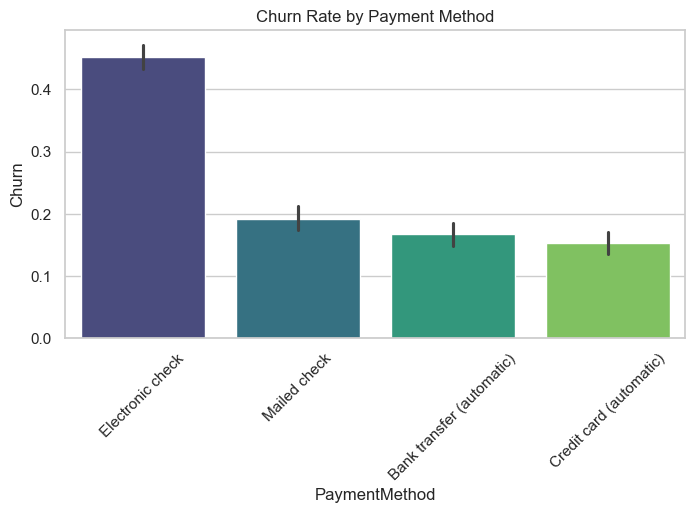

C:\Users\Tingi\AppData\Local\Temp\ipykernel_21556\2637100741.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='PaperlessBilling', y='Churn',palette="viridis")


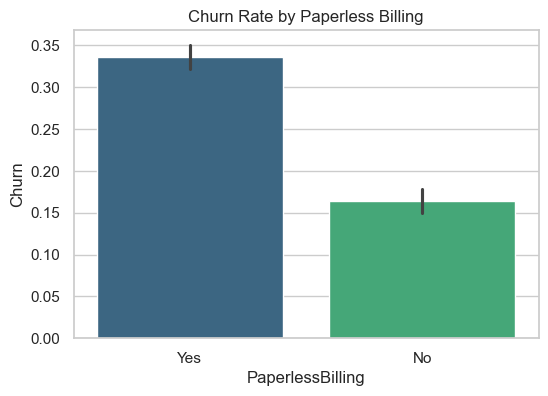

In [117]:
# Payment Method
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='PaymentMethod', y='Churn',palette="viridis")
plt.title('Churn Rate by Payment Method')
plt.xticks(rotation=45)
plt.show()

# Paperless Billing
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='PaperlessBilling', y='Churn',palette="viridis")
plt.title('Churn Rate by Paperless Billing')
plt.show()

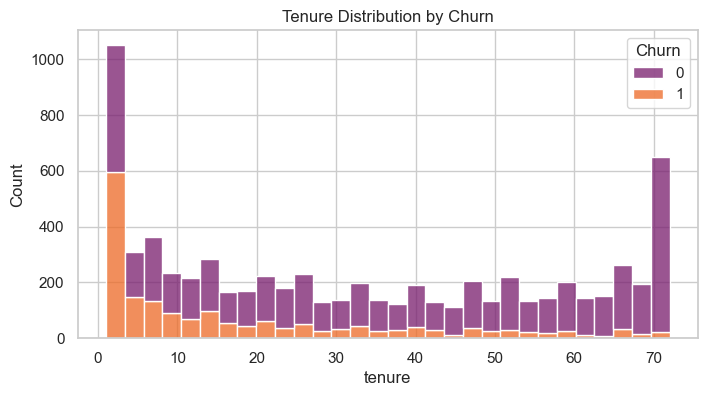

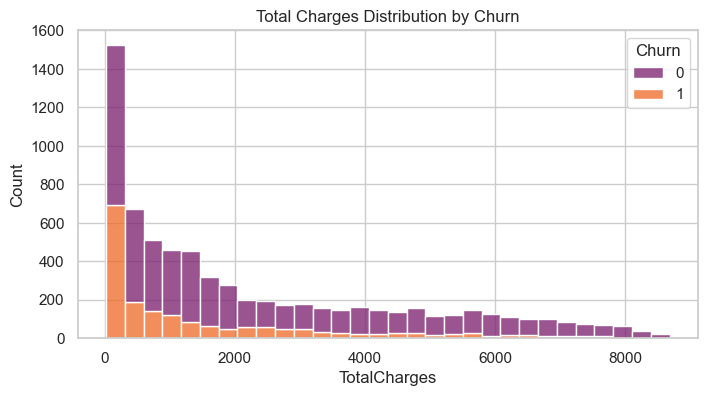

In [114]:
# Tenure Distribution
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, palette="inferno" )
plt.title('Tenure Distribution by Churn')
plt.show()

# Total Charges Distribution
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='TotalCharges', hue='Churn', multiple='stack', bins=30 , palette="inferno")
plt.title('Total Charges Distribution by Churn')
plt.show()